In [78]:
import pandas as pd 
import numpy as np
data = pd.read_csv("restaurantes_con_distrito_barrio.csv")
data

,id,Name,Address,Lat,Long,Number of Ratings,Restaurant Rating,Type of Restaurant,Number of Bookmarks,Price Range,Phone Number,Website,Instagram,Facebook,Timetable,url,NOMBRE_DISTRITO,NOMBRE_BARRIO
0,1,Freedom Cakes Diner,"Calle Cádiz 7,Madrid,Spain,28004",40.415876,-3.702805,470.0,4.5,['International'],766,Moderado,+34-910741347,http://www.freedomcakes.es/,http://www.instagram.com/freedomcakes,http://facebook.com/Freedomcakesvegan,"{'Monday': '08:00 - 00:00', 'Tuesday': '08:00 ...",https://www.happycow.net/reviews/freedom-cakes...,Centro,Sol
1,2,Mad Mad Vegan - Chueca,"Calle Pelayo 19,Madrid,Spain,28004",40.422698,-3.698609,410.0,5.0,"['American', 'Mexican']",612,Moderado,+34-914442077,https://madmadvegan.com/,http://www.instagram.com/madmadvegan,http://facebook.com/MADMADVEGAN,"{'Monday': '13:00 - 00:00', 'Tuesday': '13:00 ...",https://www.happycow.net/reviews/mad-mad-madri...,Centro,Justicia
2,3,Frutas Prohibidas,"Calle del Conde Duque, 26,Madrid,Spain,28015",40.427467,-3.710349,241.0,5.0,"['International', 'Fusion']",555,Moderado,+34-911525533,http://www.frutasprohibidas.com/,http://www.instagram.com/frutasprohibidasbar,http://facebook.com/frutasprohibidasbar,"{'Monday': 'Closed', 'Tuesday': 'Closed', 'Wed...",https://www.happycow.net/reviews/frutas-prohib...,Centro,Universidad
3,4,Mad Mad Vegan - Lavapiés,"Lavapiés 16,Madrid,Spain,28012",40.411113,-3.703039,216.0,4.5,"['American', 'Mexican']",465,Moderado,+34-910665299,https://madmadvegan.com/,http://www.instagram.com/madmadvegan,http://facebook.com/MADMADVEGAN,"{'Monday': '13:00 - 00:00', 'Tuesday': '13:00 ...",https://www.happycow.net/reviews/mad-mad-vegan...,Centro,Embajadores
4,5,Flower Burger,"Calle Luchana 13, Chamberí,Madrid,Spain,28010",40.430001,-3.701037,14.0,4.5,"['American', 'Western']",47,Barato,+34-910328968,https://www.flowerburger.it/,http://www.instagram.com/flowerburger_es,http://facebook.com/flowerburger.it,"{'Monday': '13:00 - 16:30, 19:30 - 23:30', 'Tu...",https://www.happycow.net/reviews/flower-burger...,Chamberi,Ríos Rosas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,744,Morgano Crafted Beers,"Alamo 2, Boadilla del Monte, Madrid, Spain, 28660",40.405759,-3.876917,1.0,4.0,"['Middle Eastern', 'Spanish']",2,Barato,+34-695635423,No website,No instagram,http://facebook.com/MorganoCraftedBeers,"{'Monday': '19:00 - 01:00', 'Tuesday': '19:00 ...",https://www.happycow.net/reviews/morgano-craft...,NaN,NaN
745,745,Adagio Gelateria,"Avenida de Adolfo Suárez, 7, Boadilla Del Mont...",40.405413,-3.876999,1.0,4.0,['Italian'],0,No price range,+34-912859853,No website,http://www.instagram.com/adagiogelateria,http://facebook.com/adagiogelateria,"{'Monday': '10:00 - 22:30', 'Tuesday': '10:00 ...",https://www.happycow.net/reviews/adagio-gelate...,NaN,NaN
746,746,La Huella Vegana,"Calle de las Trece Rosas, 2,Rivas-vaciamadrid,...",40.376390,-3.540020,31.0,4.5,"['Western', 'Spanish']",42,Moderado,+34-917139958,http://www.lahuellavegana.com/,No instagram,http://facebook.com/lahuellavegana,"{'Monday': '08:30 - 23:00', 'Tuesday': '08:30 ...",https://www.happycow.net/reviews/la-huella-riv...,NaN,NaN
747,747,Kamado,Calle Oslo 53CC (at X-Madrid Shopping Center)...,40.341716,-3.847447,3.0,2.5,['Asian'],2,Moderado,+34-917374775,http://kamadoasianfood.es/,No instagram,http://facebook.com/Kamadoasianfood,"{'Monday': '13:00 - 16:00, 20:00 - 23:00', 'Tu...",https://www.happycow.net/reviews/kamado-alcorc...,NaN,NaN


In [79]:
areas = data[["Lat","Long","NOMBRE_DISTRITO","NOMBRE_BARRIO"]]
areas = areas.dropna()
areas

,Lat,Long,NOMBRE_DISTRITO,NOMBRE_BARRIO
0,40.415876,-3.702805,Centro,Sol
1,40.422698,-3.698609,Centro,Justicia
2,40.427467,-3.710349,Centro,Universidad
3,40.411113,-3.703039,Centro,Embajadores
4,40.430001,-3.701037,Chamberi,Ríos Rosas
...,...,...,...,...
719,40.472222,-3.570932,Barajas,Aeropuerto
736,40.489515,-3.564276,Barajas,Aeropuerto
737,40.489562,-3.564313,Barajas,Aeropuerto
739,40.498332,-3.567598,Barajas,Aeropuerto


In [80]:
grupo_distrito = areas.groupby("NOMBRE_DISTRITO").size()
grupo_distrito_bueno = grupo_distrito[grupo_distrito<=100]
lista_bueno_split = list(grupo_distrito_bueno.index)
print(lista_bueno_split)
grupo_distrito_demasiado = grupo_distrito[grupo_distrito>100]
lista_distritos_split = list(grupo_distrito_demasiado.index)
print(lista_distritos_split)

['Arganzuela', 'Barajas', 'Carabanchel', 'Chamartin', 'Chamberi', 'Ciudad Lineal', 'Fuencarral-El Pardo', 'Hortaleza', 'Latina', 'Moncloa-Aravaca', 'Moratalaz', 'Puente de Vallecas', 'Retiro', 'Salamanca', 'San Blas - Canillejas', 'Tetuan', 'Usera', 'Vicalvaro', 'Villa de Vallecas']
['Centro']


In [94]:
lista_barrios = []
for distrito in lista_distritos_split:
    restaurantes_distrito = areas[areas["NOMBRE_DISTRITO"] == distrito]
    grupo_barrio = restaurantes_distrito.groupby("NOMBRE_BARRIO").size()
    lista_barrios = lista_barrios + list(grupo_barrio.index)
    print(grupo_barrio)

print(lista_barrios)

NOMBRE_BARRIO
Cortes          41
Embajadores    103
Justicia        75
Palacio         37
Sol             39
Universidad     84
dtype: int64
['Cortes', 'Embajadores', 'Justicia', 'Palacio', 'Sol', 'Universidad']


In [82]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

modelo = MinMaxScaler(feature_range=(0, 1))
escalado_lat = modelo.fit_transform(np.array(areas["Lat"]).reshape(-1,1))
escalado_lat = pd.DataFrame(escalado_lat, columns=["Lat"])
print(escalado_lat)

          Lat
0    0.338644
1    0.387849
2    0.422247
3    0.304290
4    0.440524
..        ...
703  0.745052
704  0.869782
705  0.870121
706  0.933376
707  0.933376

[708 rows x 1 columns]


In [83]:
escalado_long = modelo.fit_transform(np.array(areas["Long"]).reshape(-1,1))
escalado_long = pd.DataFrame(escalado_long, columns=["Long"])
print(escalado_long)

         Long
0    0.377135
1    0.396001
2    0.343215
3    0.376082
4    0.385084
..        ...
703  0.970073
704  1.000000
705  0.999834
706  0.985063
707  0.985063

[708 rows x 1 columns]


In [89]:
area_normalizada = areas.drop(["Long", "Lat"], axis=1)
area_normalizada.index = np.arange(0,708)
lat_long_area = pd.concat([escalado_lat, escalado_long], axis=1)
area_limpia = pd.concat([lat_long_area, area_normalizada], axis=1)
area_limpia

,Lat,Long,NOMBRE_DISTRITO,NOMBRE_BARRIO
0,0.338644,0.377135,Centro,Sol
1,0.387849,0.396001,Centro,Justicia
2,0.422247,0.343215,Centro,Universidad
3,0.304290,0.376082,Centro,Embajadores
4,0.440524,0.385084,Chamberi,Ríos Rosas
...,...,...,...,...
703,0.745052,0.970073,Barajas,Aeropuerto
704,0.869782,1.000000,Barajas,Aeropuerto
705,0.870121,0.999834,Barajas,Aeropuerto
706,0.933376,0.985063,Barajas,Aeropuerto


In [152]:
area_distritos = area_limpia[area_limpia["NOMBRE_DISTRITO"] != "Centro"]
area_centro = area_limpia[area_limpia["NOMBRE_DISTRITO"] == "Centro"]

In [93]:
print(area_distritos)
print(area_centro)

          Lat      Long  NOMBRE_DISTRITO NOMBRE_BARRIO
4    0.440524  0.385084         Chamberi    Ríos Rosas
204  0.384734  0.326390  Moncloa-Aravaca     Argüelles
210  0.398034  0.330805  Moncloa-Aravaca     Argüelles
238  0.373150  0.320189  Moncloa-Aravaca     Argüelles
308  0.403256  0.318962  Moncloa-Aravaca     Argüelles
..        ...       ...              ...           ...
703  0.745052  0.970073          Barajas    Aeropuerto
704  0.869782  1.000000          Barajas    Aeropuerto
705  0.870121  0.999834          Barajas    Aeropuerto
706  0.933376  0.985063          Barajas    Aeropuerto
707  0.933376  0.985063          Barajas    Aeropuerto

[329 rows x 4 columns]
          Lat      Long NOMBRE_DISTRITO NOMBRE_BARRIO
0    0.338644  0.377135          Centro           Sol
1    0.387849  0.396001          Centro      Justicia
2    0.422247  0.343215          Centro   Universidad
3    0.304290  0.376082          Centro   Embajadores
5    0.292101  0.385767          Centro   Emba

Analisis respecto de los barrios de Centro

In [153]:
barrio = lista_barrios[0]
restaurantes_barrio = area_centro[area_centro["NOMBRE_BARRIO"] == barrio]
restaurantes_barrio.index = np.arange(0, 41)
data_frame_barrio = restaurantes_barrio[["Lat", "Long"]]
matriz_barrio = np.asmatrix(data_frame_barrio)
print(matriz_barrio.shape)
print(restaurantes_barrio)

(41, 2)
         Lat      Long NOMBRE_DISTRITO NOMBRE_BARRIO
0   0.364574  0.393856          Centro        Cortes
1   0.364206  0.394490          Centro        Cortes
2   0.334410  0.380385          Centro        Cortes
3   0.343080  0.391810          Centro        Cortes
4   0.339632  0.391667          Centro        Cortes
5   0.328821  0.377764          Centro        Cortes
6   0.332312  0.384423          Centro        Cortes
7   0.351057  0.398442          Centro        Cortes
8   0.337216  0.391185          Centro        Cortes
9   0.341919  0.394738          Centro        Cortes
10  0.334071  0.388204          Centro        Cortes
11  0.334180  0.388766          Centro        Cortes
12  0.339243  0.393627          Centro        Cortes
13  0.325899  0.384945          Centro        Cortes
14  0.328972  0.389688          Centro        Cortes
15  0.346441  0.404022          Centro        Cortes
16  0.330588  0.395709          Centro        Cortes
17  0.320050  0.386954          Centro

In [154]:
[U, S, V] = np.linalg.svd(matriz_barrio)

In [155]:
print(S)

[3.29697124 0.1053314 ]


In [156]:
print(V)

[[-0.63259154 -0.7744856 ]
 [-0.7744856   0.63259154]]


In [157]:
V[0,:]
V[1,0]

-0.7744855961952852

In [158]:
matriz_barrio.shape

(41, 2)

In [159]:
area_dominio_cada_barrio = np.array([])
for i in range(matriz_barrio.shape[0]):
    barrio_i = matriz_barrio[i,:]
    potencial = np.linalg.norm(matriz_barrio-barrio_i)
    area_dominio_cada_barrio = np.append(area_dominio_cada_barrio, potencial)
area_dominio_cada_barrio = pd.Series(area_dominio_cada_barrio)
area_dominio_cada_barrio
restaurantes_barrio = pd.concat([restaurantes_barrio, area_dominio_cada_barrio], axis=1)
restaurantes_barrio.columns.values[-1] = "potencial"
restaurantes_barrio

,Lat,Long,NOMBRE_DISTRITO,NOMBRE_BARRIO,potencial
0,0.364574,0.393856,Centro,Cortes,0.278055
1,0.364206,0.394490,Centro,Cortes,0.275511
2,0.334410,0.380385,Centro,Cortes,0.176482
3,0.343080,0.391810,Centro,Cortes,0.169121
4,0.339632,0.391667,Centro,Cortes,0.155682
5,0.328821,0.377764,Centro,Cortes,0.180645
6,0.332312,0.384423,Centro,Cortes,0.156190
7,0.351057,0.398442,Centro,Cortes,0.201614
8,0.337216,0.391185,Centro,Cortes,0.148292
9,0.341919,0.394738,Centro,Cortes,0.160236


Text(0, 0.5, 'Eje Y')

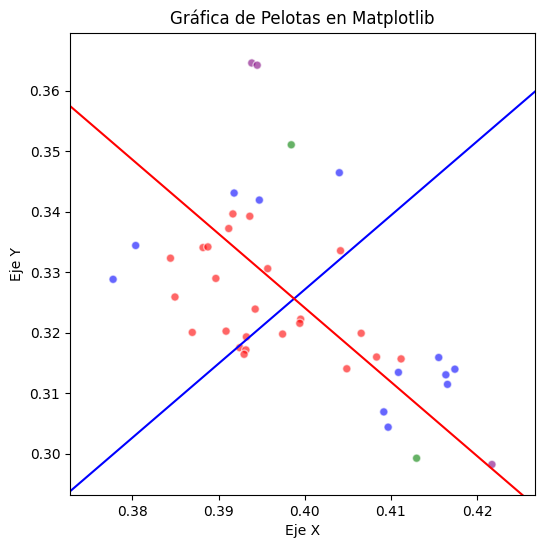

In [172]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
maximo = restaurantes_barrio["potencial"].max()
minimo = restaurantes_barrio["potencial"].min()
cuarta = (maximo-minimo)/4

def colorear(x):
    if minimo <= x < minimo + cuarta:
        return "red"
    elif minimo + cuarta <= x < minimo + 2*cuarta:
        return "blue"
    elif minimo + 2*cuarta <= x < minimo + 3*cuarta:
        return "green"
    else:
        return "purple"


restaurantes_barrio["color"] = restaurantes_barrio["potencial"].map(colorear)
# Crear un gráfico de dispersión para las pelotas
plt.scatter(np.array(data_frame_barrio["Long"]), np.array(data_frame_barrio["Lat"]), c=np.array(restaurantes_barrio["color"]),alpha=0.6, edgecolors="w", linewidth=1)
center_x = np.mean(data_frame_barrio["Long"])
center_y = np.mean(data_frame_barrio["Lat"])

# Crear las rectas ajustadas al centro
# Ajuste de las rectas, desplazando hacia el centro
x = np.linspace(-1, 1, 10000)  # Definir el rango de X para las rectas
y1 = V[0, 1] / V[0, 0] * x + center_y - (V[0, 1] / V[0, 0]) * center_x  # Ajustar recta 1
y2 = V[1, 0] / V[1, 1] * x + center_y - (V[1, 0] / V[1, 1]) * center_x  # Ajustar recta 2

plt.plot(x, y1, color="blue")
plt.plot(x, y2, color="red")

# Ajustar los límites de los ejes
plt.xlim(np.min(data_frame_barrio["Long"])-0.005, np.max(data_frame_barrio["Long"])+0.005)
plt.ylim(np.min(data_frame_barrio["Lat"])-0.005, np.max(data_frame_barrio["Lat"])+0.005)

# Añadir título y etiquetas
plt.title("Gráfica de Pelotas en Matplotlib")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")